<a href="https://colab.research.google.com/github/Drobilk/LAB-SEMESTR-2/blob/main/%D0%BB%D0%B0%D0%B1%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 5. Боливия

In [ ]:
# Нормализация временных рядов
import requests 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
#Importing the data from the webpage into a DataFrame 
url= 'http://pogoda-service.ru/archive_gsod_res.php?country=BL&station=851510&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req=requests.get(url) 
data=pd.read_html(req.text) 
df=data[0]
df.columns= ('Дата', 'Максимальная температура', 'Минимальная температура', 'Средняя температура', 'Атмосферное давление',	'Скорость ветра',	'Осадки',	'Эффективная температура')

df




,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,06.12.2018,22.1,18.4,20.9,NaN,2,0,21.7
1,24.01.2019,26.0,17.9,23.4,NaN,0,0,26.0
2,15.03.2019,25.6,19.2,22.8,NaN,1,0,24.4
3,06.01.2020,27.0,16.3,24.3,853.0,5,17,23.4
4,07.01.2020,25.0,16.4,22.6,855.5,6,0,20.9
5,09.01.2020,26.1,17.8,23.6,857.2,6,0,22.2
6,10.01.2020,27.7,17.6,24.9,857.1,5,0,24.0
7,12.01.2020,27.6,15.1,23.4,858.2,1,0,25.1
8,14.01.2020,26.7,18.2,24.3,857.4,3,0,25.0
9,15.01.2020,27.0,19.0,23.8,858.0,3,2,24.3


In [ ]:
df.drop(df.columns[[1,2,4,5,6,7]], axis = 1, inplace = True)
df

,Дата,Средняя температура
3,06.01.2020,24.3
4,07.01.2020,22.6
5,09.01.2020,23.6
6,10.01.2020,24.9
7,12.01.2020,23.4
8,14.01.2020,24.3
9,15.01.2020,23.8
10,16.01.2020,24.7
11,17.01.2020,20.1
12,18.01.2020,24.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 21
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Дата                 19 non-null     object 
 1   Средняя температура  19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 456.0+ bytes


In [ ]:
df['Дата']=df['Дата'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 21
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 19 non-null     datetime64[ns]
 1   Средняя температура  19 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 456.0 bytes


In [ ]:
df.isna().sum()

Дата                   0
Средняя температура    0
dtype: int64

In [ ]:
df.set_index('Дата', inplace=True)
df.head()

,Средняя температура
Дата,
2020-06-01,24.3
2020-07-01,22.6
2020-09-01,23.6
2020-10-01,24.9
2020-12-01,23.4


In [ ]:
values = df.values
values = values.reshape(len(values), 1)
scaler = MinMaxScaler()
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))



Min: 20.100000, Max: 27.000000


In [ ]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])


[0.60869565]
[0.36231884]
[0.50724638]
[0.69565217]
[0.47826087]
[24.3]
[22.6]
[23.6]
[24.9]
[23.4]


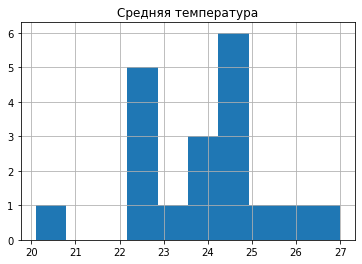

In [ ]:
df.hist()
pyplot.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

values = df.values
values = values.reshape(len(values), 1)

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 23.878947, StandardDeviation: 1.489818


In [ ]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[0.28262024]
[-0.85845897]
[-0.18723591]
[0.68535407]
[-0.32148052]
[24.3]
[22.6]
[23.6]
[24.9]
[23.4]


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving laba8.xlsx to laba8.xlsx


In [ ]:
df1 = pd.read_excel('laba8.xlsx')
df1

,Нормализация,Unnamed: 1,стандартизация,Unnamed: 3
0,мин,макс,среднее,стан.от-ние
1,20.1,27,23.8789,1.48982
